In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import csv
import networkx as nx
from operator import itemgetter
import warnings
warnings.filterwarnings('ignore')

# Run Flashweave in Julia, then load the edge table

In [3]:
os.chdir('/groups/banfield/projects/industrial/ThiocyanateBioreactor/2021/SCN_phage/microbial_SCN_genomes/network_analysis/flashweave_2023/')
df_flash = pd.read_csv('fastweave_detailed_alpha005_k0.edgelist', engine='python', header=None, sep="\t", comment = '#') 
df_flash.columns = ['org1','org2','corr']
df_flash_cutoff = df_flash[df_flash['corr'] >= 0.35]
print('Total edges above cutoff '+str(len(df_flash_cutoff)))

Total edges above cutoff 721


## Plot distributions

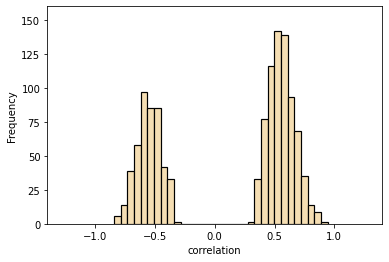

In [4]:
df_flash['corr'].plot.hist(by=None, bins=32,legend=False, color = 'wheat',edgecolor='black', linewidth=1.2)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 28}
plt.xlabel("correlation")
#plt.yticks(np.arange(0, 6100, 1000))
plt.rc('font', **font)
plt.axis([-1.4, 1.4, 0, 160])
plt.rcParams['figure.figsize'] = [6,6]
plt.rcParams.update({'font.size': 14})

### write edges and save to py file

In [5]:
df_edges = df_flash_cutoff.copy()
df_edges['command']= "g.add_edge(node_list[" + df_flash["org1"].astype(str) + "],node_list[" + df_flash["org2"].astype(str) + "],weight=" + df_flash["corr"].astype(str) + ")"
index_list = df_edges.command.tolist()
with open('edge.py', 'w') as f:  
    for item in index_list:  
        f.write("%s\n" % item)

,org1,org2,corr,command
0,10,58,0.603234,"g.add_edge(node_list[10],node_list[58],weight=..."
1,36,213,0.584273,"g.add_edge(node_list[36],node_list[213],weight..."
2,10,95,0.511205,"g.add_edge(node_list[10],node_list[95],weight=..."
3,36,185,0.408457,"g.add_edge(node_list[36],node_list[185],weight..."
4,132,54,0.544145,"g.add_edge(node_list[132],node_list[54],weight..."


### write nodes and save to py file

In [5]:
#Find unique genomes and save them for node commands
nodes = np.unique(df_flash_cutoff[['org1', 'org2']].values)

df_nodes = pd.DataFrame(data=nodes)
df_nodes.columns = ['nodes']
df_nodes['command']= "g.add_node(node_list[" + df_nodes["nodes"].astype(str)+"])"

# save the node command to file
index_list = df_nodes.command.tolist()
with open('nodes.py', 'w') as f:  
    for item in index_list:  
        f.write("%s\n" % item)
        
df_nodes['nodes'] = df_nodes['nodes'].astype(int)
all_nodes = df_nodes['nodes'].to_list()

print('Total nodes: '+ str(len(df_nodes)))

Total nodes: 164


In [6]:
g = nx.Graph()
node_list=[]
x = range(309)
for i in x:
    node_list.append(i)
    
# %load nodes.py
# %load edge.py

In [8]:
# %load nodes.py
g.add_node(node_list[1])
g.add_node(node_list[4])
g.add_node(node_list[6])
g.add_node(node_list[8])
g.add_node(node_list[9])
g.add_node(node_list[10])
g.add_node(node_list[11])
g.add_node(node_list[12])
g.add_node(node_list[14])
g.add_node(node_list[15])
g.add_node(node_list[16])
g.add_node(node_list[20])
g.add_node(node_list[23])
g.add_node(node_list[24])
g.add_node(node_list[28])
g.add_node(node_list[29])
g.add_node(node_list[31])
g.add_node(node_list[32])
g.add_node(node_list[33])
g.add_node(node_list[34])
g.add_node(node_list[36])
g.add_node(node_list[37])
g.add_node(node_list[38])
g.add_node(node_list[41])
g.add_node(node_list[43])
g.add_node(node_list[45])
g.add_node(node_list[46])
g.add_node(node_list[48])
g.add_node(node_list[49])
g.add_node(node_list[50])
g.add_node(node_list[51])
g.add_node(node_list[52])
g.add_node(node_list[53])
g.add_node(node_list[54])
g.add_node(node_list[55])
g.add_node(node_list[58])
g.add_node(node_list[59])
g.add_node(node_list[62])
g.add_node(node_list[63])
g.add_node(node_list[66])
g.add_node(node_list[68])
g.add_node(node_list[69])
g.add_node(node_list[74])
g.add_node(node_list[75])
g.add_node(node_list[79])
g.add_node(node_list[81])
g.add_node(node_list[82])
g.add_node(node_list[83])
g.add_node(node_list[86])
g.add_node(node_list[87])
g.add_node(node_list[88])
g.add_node(node_list[89])
g.add_node(node_list[92])
g.add_node(node_list[94])
g.add_node(node_list[95])
g.add_node(node_list[100])
g.add_node(node_list[101])
g.add_node(node_list[103])
g.add_node(node_list[106])
g.add_node(node_list[108])
g.add_node(node_list[111])
g.add_node(node_list[112])
g.add_node(node_list[113])
g.add_node(node_list[116])
g.add_node(node_list[117])
g.add_node(node_list[119])
g.add_node(node_list[120])
g.add_node(node_list[125])
g.add_node(node_list[126])
g.add_node(node_list[128])
g.add_node(node_list[130])
g.add_node(node_list[132])
g.add_node(node_list[133])
g.add_node(node_list[135])
g.add_node(node_list[136])
g.add_node(node_list[137])
g.add_node(node_list[138])
g.add_node(node_list[139])
g.add_node(node_list[143])
g.add_node(node_list[144])
g.add_node(node_list[146])
g.add_node(node_list[155])
g.add_node(node_list[156])
g.add_node(node_list[157])
g.add_node(node_list[163])
g.add_node(node_list[164])
g.add_node(node_list[165])
g.add_node(node_list[166])
g.add_node(node_list[167])
g.add_node(node_list[168])
g.add_node(node_list[169])
g.add_node(node_list[172])
g.add_node(node_list[176])
g.add_node(node_list[179])
g.add_node(node_list[180])
g.add_node(node_list[181])
g.add_node(node_list[184])
g.add_node(node_list[185])
g.add_node(node_list[187])
g.add_node(node_list[192])
g.add_node(node_list[197])
g.add_node(node_list[201])
g.add_node(node_list[204])
g.add_node(node_list[205])
g.add_node(node_list[206])
g.add_node(node_list[207])
g.add_node(node_list[209])
g.add_node(node_list[210])
g.add_node(node_list[211])
g.add_node(node_list[213])
g.add_node(node_list[214])
g.add_node(node_list[215])
g.add_node(node_list[216])
g.add_node(node_list[218])
g.add_node(node_list[219])
g.add_node(node_list[221])
g.add_node(node_list[222])
g.add_node(node_list[223])
g.add_node(node_list[225])
g.add_node(node_list[227])
g.add_node(node_list[228])
g.add_node(node_list[229])
g.add_node(node_list[230])
g.add_node(node_list[231])
g.add_node(node_list[233])
g.add_node(node_list[234])
g.add_node(node_list[236])
g.add_node(node_list[241])
g.add_node(node_list[242])
g.add_node(node_list[243])
g.add_node(node_list[247])
g.add_node(node_list[248])
g.add_node(node_list[250])
g.add_node(node_list[255])
g.add_node(node_list[256])
g.add_node(node_list[258])
g.add_node(node_list[261])
g.add_node(node_list[262])
g.add_node(node_list[263])
g.add_node(node_list[265])
g.add_node(node_list[266])
g.add_node(node_list[267])
g.add_node(node_list[268])
g.add_node(node_list[270])
g.add_node(node_list[272])
g.add_node(node_list[273])
g.add_node(node_list[274])
g.add_node(node_list[279])
g.add_node(node_list[280])
g.add_node(node_list[281])
g.add_node(node_list[284])
g.add_node(node_list[286])
g.add_node(node_list[291])
g.add_node(node_list[292])
g.add_node(node_list[296])
g.add_node(node_list[298])
g.add_node(node_list[299])
g.add_node(node_list[301])
g.add_node(node_list[302])
g.add_node(node_list[304])
g.add_node(node_list[305])
g.add_node(node_list[306])
g.add_node(node_list[307])
g.add_node(node_list[308])


In [10]:
# %load edge.py
g.add_edge(node_list[10],node_list[58],weight=0.6032344152472346)
g.add_edge(node_list[36],node_list[213],weight=0.5842728583369364)
g.add_edge(node_list[10],node_list[95],weight=0.5112050093760507)
g.add_edge(node_list[36],node_list[185],weight=0.4084572292173449)
g.add_edge(node_list[132],node_list[54],weight=0.5441448296046432)
g.add_edge(node_list[95],node_list[250],weight=0.7891642457986023)
g.add_edge(node_list[181],node_list[74],weight=0.5567265640575567)
g.add_edge(node_list[258],node_list[74],weight=0.5522664398362521)
g.add_edge(node_list[58],node_list[66],weight=0.606555595748039)
g.add_edge(node_list[36],node_list[66],weight=0.4797722195792476)
g.add_edge(node_list[185],node_list[66],weight=0.4034926968171042)
g.add_edge(node_list[54],node_list[66],weight=0.6055863030546453)
g.add_edge(node_list[201],node_list[4],weight=0.6144995960989633)
g.add_edge(node_list[54],node_list[4],weight=0.6341843482618865)
g.add_edge(node_list[116],node_list[4],weight=0.4431353844144808)
g.add_edge(node_list[66],node_list[4],weight=0.473204367029567)
g.add_edge(node_list[181],node_list[88],weight=0.5574786405674477)
g.add_edge(node_list[258],node_list[88],weight=0.6299273918037654)
g.add_edge(node_list[236],node_list[88],weight=0.6580950242864949)
g.add_edge(node_list[54],node_list[88],weight=0.7500443743721589)
g.add_edge(node_list[116],node_list[88],weight=0.4901115930976363)
g.add_edge(node_list[74],node_list[88],weight=0.653387241531883)
g.add_edge(node_list[4],node_list[88],weight=0.4840593249364715)
g.add_edge(node_list[95],node_list[222],weight=0.7716325873600118)
g.add_edge(node_list[185],node_list[222],weight=0.3796308397600494)
g.add_edge(node_list[185],node_list[33],weight=0.4938053570754361)
g.add_edge(node_list[222],node_list[33],weight=0.5737443579892775)
g.add_edge(node_list[185],node_list[308],weight=0.640211257572224)
g.add_edge(node_list[116],node_list[308],weight=0.5771496146153579)
g.add_edge(node_list[66],node_list[308],weight=0.6549077422102091)
g.add_edge(node_list[4],node_list[308],weight=0.6097654373257444)
g.add_edge(node_list[95],node_list[228],weight=0.5194615683070056)
g.add_edge(node_list[250],node_list[228],weight=0.5330477230585177)
g.add_edge(node_list[95],node_list[29],weight=0.6826245652376073)
g.add_edge(node_list[250],node_list[29],weight=0.4970438279695781)
g.add_edge(node_list[261],node_list[111],weight=0.5025958797926945)
g.add_edge(node_list[181],node_list[53],weight=0.5814452975907263)
g.add_edge(node_list[54],node_list[53],weight=0.6670912449274642)
g.add_edge(node_list[4],node_list[53],weight=0.6354509358762818)
g.add_edge(node_list[88],node_list[53],weight=0.8647878739085912)
g.add_edge(node_list[50],node_list[247],weight=0.6386011552564911)
g.add_edge(node_list[132],node_list[89],weight=0.7561036337838356)
g.add_edge(node_list[132],node_list[14],weight=0.5634755797372492)
g.add_edge(node_list[89],node_list[14],weight=0.6461593712001384)
g.add_edge(node_list[261],node_list[62],weight=0.5549559290099884)
g.add_edge(node_list[214],node_list[280],weight=0.5711590599309991)
g.add_edge(node_list[261],node_list[280],weight=0.5830106058862988)
g.add_edge(node_list[62],node_list[280],weight=0.6873576074977269)
g.add_edge(node_list[211],node_list[255],weight=0.6967730215360015)
g.add_edge(node_list[62],node_list[255],weight=0.7632527564313983)
g.add_edge(node_list[280],node_list[255],weight=0.5590819153154803)
g.add_edge(node_list[270],node_list[306],weight=0.7515939680618607)
g.add_edge(node_list[36],node_list[168],weight=0.5042242119044678)
g.add_edge(node_list[185],node_list[168],weight=0.4539435337676281)
g.add_edge(node_list[54],node_list[168],weight=0.5799430015544562)
g.add_edge(node_list[222],node_list[168],weight=0.5054416847895833)
g.add_edge(node_list[213],node_list[262],weight=0.6302521341245947)
g.add_edge(node_list[268],node_list[262],weight=0.6411899218959132)
g.add_edge(node_list[88],node_list[262],weight=0.5349834351353631)
g.add_edge(node_list[50],node_list[234],weight=0.4979711852711478)
g.add_edge(node_list[280],node_list[234],weight=0.7986790260429822)
g.add_edge(node_list[201],node_list[63],weight=0.6383170293260161)
g.add_edge(node_list[280],node_list[63],weight=0.4901001208656344)
g.add_edge(node_list[306],node_list[63],weight=0.5406589290030351)
g.add_edge(node_list[306],node_list[307],weight=0.5992411757216084)
g.add_edge(node_list[14],node_list[302],weight=0.7154360813927082)
g.add_edge(node_list[280],node_list[143],weight=0.5328332784963822)
g.add_edge(node_list[234],node_list[143],weight=0.5468092776179018)
g.add_edge(node_list[63],node_list[143],weight=0.4285786589940213)
g.add_edge(node_list[280],node_list[221],weight=0.7167946780454727)
g.add_edge(node_list[210],node_list[51],weight=0.5791624820075254)
g.add_edge(node_list[62],node_list[51],weight=0.6256576589347408)
g.add_edge(node_list[255],node_list[51],weight=0.5989085222273808)
g.add_edge(node_list[262],node_list[51],weight=0.8082984923892866)
g.add_edge(node_list[234],node_list[51],weight=0.5493969268379011)
g.add_edge(node_list[58],node_list[103],weight=0.6129451117624576)
g.add_edge(node_list[261],node_list[101],weight=0.5393098553150188)
g.add_edge(node_list[50],node_list[101],weight=0.7914316549340458)
g.add_edge(node_list[209],node_list[101],weight=0.5853733579501886)
g.add_edge(node_list[247],node_list[101],weight=0.5149710381273228)
g.add_edge(node_list[143],node_list[101],weight=0.6224517646478623)
g.add_edge(node_list[209],node_list[1],weight=0.538787363305775)
g.add_edge(node_list[302],node_list[1],weight=0.7113293829363451)
g.add_edge(node_list[101],node_list[1],weight=0.638126086789787)
g.add_edge(node_list[268],node_list[184],weight=0.6605822331140848)
g.add_edge(node_list[50],node_list[184],weight=0.722095786795648)
g.add_edge(node_list[234],node_list[184],weight=0.7364192729201009)
g.add_edge(node_list[63],node_list[184],weight=0.6075464121242866)
g.add_edge(node_list[51],node_list[184],weight=0.5657998787836684)
g.add_edge(node_list[270],node_list[169],weight=0.5743317144972926)
g.add_edge(node_list[280],node_list[169],weight=0.5341063011985737)
g.add_edge(node_list[306],node_list[169],weight=0.7237597883683479)
g.add_edge(node_list[307],node_list[169],weight=0.5777646672033826)
g.add_edge(node_list[143],node_list[169],weight=0.5200433841222822)
g.add_edge(node_list[261],node_list[197],weight=0.5546486255874443)
g.add_edge(node_list[111],node_list[197],weight=0.6839391742105836)
g.add_edge(node_list[280],node_list[197],weight=0.5533262789143325)
g.add_edge(node_list[143],node_list[197],weight=0.4774750660037719)
g.add_edge(node_list[169],node_list[197],weight=0.6234060394997598)
g.add_edge(node_list[181],node_list[24],weight=0.5496016187828353)
g.add_edge(node_list[28],node_list[24],weight=0.564398498314424)
g.add_edge(node_list[261],node_list[24],weight=0.4857130574972868)
g.add_edge(node_list[214],node_list[43],weight=0.5709194268679606)
g.add_edge(node_list[280],node_list[43],weight=0.523910797837751)
g.add_edge(node_list[50],node_list[157],weight=0.6009014246786754)
g.add_edge(node_list[143],node_list[157],weight=0.4697049709596966)
g.add_edge(node_list[143],node_list[20],weight=0.4389280379192607)
g.add_edge(node_list[103],node_list[20],weight=0.574179154355491)
g.add_edge(node_list[197],node_list[20],weight=0.5908727237257205)
g.add_edge(node_list[250],node_list[215],weight=0.3861403447266212)
g.add_edge(node_list[211],node_list[215],weight=0.552790998832212)
g.add_edge(node_list[261],node_list[215],weight=0.3828607798506244)
g.add_edge(node_list[228],node_list[215],weight=0.5963713043016762)
g.add_edge(node_list[62],node_list[215],weight=0.6436339204554673)
g.add_edge(node_list[280],node_list[215],weight=0.4338100295422638)
g.add_edge(node_list[255],node_list[215],weight=0.5443177904809752)
g.add_edge(node_list[306],node_list[215],weight=0.4753168044931249)
g.add_edge(node_list[20],node_list[215],weight=0.6254276804174455)
g.add_edge(node_list[29],node_list[229],weight=0.6037591689969062)
g.add_edge(node_list[270],node_list[68],weight=0.4488085980159402)
g.add_edge(node_list[234],node_list[68],weight=0.5399870948425117)
g.add_edge(node_list[63],node_list[68],weight=0.5332850296006983)
g.add_edge(node_list[184],node_list[68],weight=0.6269496863073377)
g.add_edge(node_list[169],node_list[68],weight=0.5111785722180954)
g.add_edge(node_list[95],node_list[106],weight=0.7163891092953734)
g.add_edge(node_list[250],node_list[106],weight=0.5850139448658497)
g.add_edge(node_list[222],node_list[106],weight=0.3669737578007415)
g.add_edge(node_list[228],node_list[106],weight=0.4859515848410755)
g.add_edge(node_list[29],node_list[106],weight=0.5541887740868892)
g.add_edge(node_list[291],node_list[164],weight=0.4911282300861323)
g.add_edge(node_list[229],node_list[164],weight=0.6356052781814573)
g.add_edge(node_list[222],node_list[219],weight=0.4609296020325115)
g.add_edge(node_list[228],node_list[219],weight=0.4913258584245919)
g.add_edge(node_list[255],node_list[219],weight=0.3920065944860812)
g.add_edge(node_list[168],node_list[219],weight=0.3974035653325671)
g.add_edge(node_list[221],node_list[219],weight=0.7193170909680722)
g.add_edge(node_list[43],node_list[219],weight=0.613127637203177)
g.add_edge(node_list[215],node_list[219],weight=0.5256945222559412)
g.add_edge(node_list[106],node_list[219],weight=0.4400705511979946)
g.add_edge(node_list[36],node_list[83],weight=0.4989201164472077)
g.add_edge(node_list[222],node_list[41],weight=0.6616901711257079)
g.add_edge(node_list[33],node_list[41],weight=0.7427542409967134)
g.add_edge(node_list[31],node_list[41],weight=0.5847394409381865)
g.add_edge(node_list[103],node_list[41],weight=0.5692371488603405)
g.add_edge(node_list[219],node_list[41],weight=0.3974366464216777)
g.add_edge(node_list[273],node_list[41],weight=0.3563618396674595)
g.add_edge(node_list[100],node_list[166],weight=0.5370437882269372)
g.add_edge(node_list[10],node_list[206],weight=0.3913157336841065)
g.add_edge(node_list[95],node_list[206],weight=0.4940689532426446)
g.add_edge(node_list[185],node_list[206],weight=0.3627362591642288)
g.add_edge(node_list[211],node_list[206],weight=0.5556275159006563)
g.add_edge(node_list[50],node_list[206],weight=0.5023442368347139)
g.add_edge(node_list[119],node_list[206],weight=0.4313764464431335)
g.add_edge(node_list[31],node_list[206],weight=0.7096501277424653)
g.add_edge(node_list[164],node_list[206],weight=0.3518260261045073)
g.add_edge(node_list[116],node_list[241],weight=0.4610374947242526)
g.add_edge(node_list[222],node_list[241],weight=0.544539239042091)
g.add_edge(node_list[168],node_list[241],weight=0.4852032983822258)
g.add_edge(node_list[41],node_list[241],weight=0.5678430089132764)
g.add_edge(node_list[185],node_list[192],weight=0.3769607950069935)
g.add_edge(node_list[222],node_list[192],weight=0.4193482773058032)
g.add_edge(node_list[168],node_list[192],weight=0.4633247605378816)
g.add_edge(node_list[206],node_list[192],weight=0.4006385619514402)
g.add_edge(node_list[28],node_list[55],weight=0.3908323506595242)
g.add_edge(node_list[24],node_list[55],weight=0.3708106500320577)
g.add_edge(node_list[100],node_list[55],weight=0.5561314315745041)
g.add_edge(node_list[273],node_list[55],weight=0.5282305758299057)
g.add_edge(node_list[166],node_list[55],weight=0.464388603525798)
g.add_edge(node_list[95],node_list[180],weight=0.5639335064414018)
g.add_edge(node_list[250],node_list[180],weight=0.3892304455163056)
g.add_edge(node_list[222],node_list[180],weight=0.5466297546122513)
g.add_edge(node_list[228],node_list[180],weight=0.3985212902914093)
g.add_edge(node_list[168],node_list[180],weight=0.5715858088962931)
g.add_edge(node_list[215],node_list[180],weight=0.4653224041055042)
g.add_edge(node_list[68],node_list[180],weight=0.4206689814030832)
g.add_edge(node_list[106],node_list[180],weight=0.6503596834660883)
g.add_edge(node_list[219],node_list[180],weight=0.4870916572861261)
g.add_edge(node_list[41],node_list[180],weight=0.4790576542606002)
g.add_edge(node_list[206],node_list[180],weight=0.618810793486687)
g.add_edge(node_list[241],node_list[180],weight=0.4354889568801589)
g.add_edge(node_list[54],node_list[130],weight=0.6675898368599672)
g.add_edge(node_list[66],node_list[130],weight=0.5665339482728808)
g.add_edge(node_list[308],node_list[130],weight=0.5562202478177799)
g.add_edge(node_list[192],node_list[130],weight=0.51384132666298)
g.add_edge(node_list[291],node_list[305],weight=0.5198783640101101)
g.add_edge(node_list[106],node_list[305],weight=0.5166641878808531)
g.add_edge(node_list[55],node_list[305],weight=0.6445748143550579)
g.add_edge(node_list[130],node_list[305],weight=0.5853795914360069)
g.add_edge(node_list[279],node_list[138],weight=0.6417980819115847)
g.add_edge(node_list[222],node_list[138],weight=0.4889498657248026)
g.add_edge(node_list[219],node_list[138],weight=0.3976752676578441)
g.add_edge(node_list[305],node_list[138],weight=0.5411909732046374)
g.add_edge(node_list[116],node_list[45],weight=0.4906676501090056)
g.add_edge(node_list[66],node_list[45],weight=0.510141100333642)
g.add_edge(node_list[88],node_list[45],weight=0.5617769757581847)
g.add_edge(node_list[222],node_list[45],weight=0.5247893596966943)
g.add_edge(node_list[33],node_list[45],weight=0.742129683009246)
g.add_edge(node_list[41],node_list[45],weight=0.5372445618682099)
g.add_edge(node_list[241],node_list[45],weight=0.503061218622)
g.add_edge(node_list[211],node_list[48],weight=0.5829600305490613)
g.add_edge(node_list[228],node_list[48],weight=0.9462415367741426)
g.add_edge(node_list[20],node_list[48],weight=0.5356776375337131)
g.add_edge(node_list[215],node_list[48],weight=0.6674206674394353)
g.add_edge(node_list[106],node_list[48],weight=0.4909797517303109)
g.add_edge(node_list[219],node_list[48],weight=0.390705978311499)
g.add_edge(node_list[41],node_list[48],weight=0.3812589714523364)
g.add_edge(node_list[241],node_list[48],weight=0.4834766865879017)
g.add_edge(node_list[180],node_list[48],weight=0.4825457519682777)
g.add_edge(node_list[45],node_list[48],weight=0.43681830440366)
g.add_edge(node_list[66],node_list[144],weight=0.4511940710859982)
g.add_edge(node_list[222],node_list[144],weight=0.469632846012261)
g.add_edge(node_list[33],node_list[144],weight=0.6790617020988184)
g.add_edge(node_list[308],node_list[144],weight=0.5719145179656587)
g.add_edge(node_list[103],node_list[144],weight=0.6617774479896309)
g.add_edge(node_list[41],node_list[144],weight=0.6000031353593448)
g.add_edge(node_list[241],node_list[144],weight=0.5144202233421248)
g.add_edge(node_list[45],node_list[144],weight=0.6975713486323628)
g.add_edge(node_list[10],node_list[218],weight=0.3682455133294475)
g.add_edge(node_list[50],node_list[218],weight=0.4115907434820426)
g.add_edge(node_list[164],node_list[218],weight=0.7100860753309925)
g.add_edge(node_list[206],node_list[218],weight=0.4682501424487818)
g.add_edge(node_list[130],node_list[16],weight=0.5451380842469499)
g.add_edge(node_list[218],node_list[16],weight=0.5569025166076492)
g.add_edge(node_list[10],node_list[15],weight=0.4105924080367258)
g.add_edge(node_list[218],node_list[15],weight=0.5019658857623482)
g.add_edge(node_list[29],node_list[108],weight=0.5817019126245889)
g.add_edge(node_list[15],node_list[108],weight=0.5972817953229429)
g.add_edge(node_list[54],node_list[112],weight=0.4954097871298007)
g.add_edge(node_list[116],node_list[112],weight=0.5429464472400716)
g.add_edge(node_list[74],node_list[112],weight=0.6861184221634394)
g.add_edge(node_list[4],node_list[112],weight=0.5485668728198362)
g.add_edge(node_list[88],node_list[112],weight=0.4994903888951989)
g.add_edge(node_list[53],node_list[112],weight=0.6672383190711116)
g.add_edge(node_list[55],node_list[112],weight=0.5583876775013111)
g.add_edge(node_list[10],node_list[230],weight=0.5000447661761802)
g.add_edge(node_list[273],node_list[230],weight=0.4275365983350161)
g.add_edge(node_list[55],node_list[230],weight=0.4502088721783883)
g.add_edge(node_list[218],node_list[230],weight=0.3884720515050383)
g.add_edge(node_list[108],node_list[230],weight=0.643844680770037)
g.add_edge(node_list[112],node_list[230],weight=0.4009640467179271)
g.add_edge(node_list[12],node_list[230],weight=0.5755653841365965)
g.add_edge(node_list[10],node_list[155],weight=0.7224849070493783)
g.add_edge(node_list[164],node_list[155],weight=0.5399909906867162)
g.add_edge(node_list[15],node_list[155],weight=0.6210830037229667)
g.add_edge(node_list[108],node_list[155],weight=0.6458542212318273)
g.add_edge(node_list[112],node_list[155],weight=0.498898271760707)
g.add_edge(node_list[230],node_list[155],weight=0.7348761831251982)
g.add_edge(node_list[291],node_list[37],weight=0.6539807311191611)
g.add_edge(node_list[29],node_list[37],weight=0.510821646840273)
g.add_edge(node_list[164],node_list[37],weight=0.6006224847665468)
g.add_edge(node_list[218],node_list[37],weight=0.6440077585511564)
g.add_edge(node_list[155],node_list[37],weight=0.6545679992814121)
g.add_edge(node_list[112],node_list[256],weight=0.5735361311033965)
g.add_edge(node_list[230],node_list[256],weight=0.6573145345115976)
g.add_edge(node_list[155],node_list[256],weight=0.769222501245427)
g.add_edge(node_list[37],node_list[256],weight=0.585784709008972)
g.add_edge(node_list[95],node_list[233],weight=0.4822271678148547)
g.add_edge(node_list[250],node_list[233],weight=0.4055525560442553)
g.add_edge(node_list[222],node_list[233],weight=0.4868198387311648)
g.add_edge(node_list[291],node_list[233],weight=0.6736326351021563)
g.add_edge(node_list[29],node_list[233],weight=0.5897842741818677)
g.add_edge(node_list[31],node_list[233],weight=0.5543853332673206)
g.add_edge(node_list[106],node_list[233],weight=0.4495901438676493)
g.add_edge(node_list[219],node_list[233],weight=0.4791766181440838)
g.add_edge(node_list[273],node_list[233],weight=0.4975213891891739)
g.add_edge(node_list[41],node_list[233],weight=0.5127463605864512)
g.add_edge(node_list[45],node_list[233],weight=0.5115562591277327)
g.add_edge(node_list[48],node_list[233],weight=0.3582244609976627)
g.add_edge(node_list[291],node_list[120],weight=0.5685310696185879)
g.add_edge(node_list[29],node_list[120],weight=0.6010530182397947)
g.add_edge(node_list[106],node_list[120],weight=0.4317663159883664)
g.add_edge(node_list[180],node_list[120],weight=0.5271005910052644)
g.add_edge(node_list[138],node_list[120],weight=0.4569415679467757)
g.add_edge(node_list[37],node_list[120],weight=0.498093845098884)
g.add_edge(node_list[95],node_list[146],weight=0.6548654892468336)
g.add_edge(node_list[250],node_list[146],weight=0.7608683116686009)
g.add_edge(node_list[228],node_list[146],weight=0.5209271025977368)
g.add_edge(node_list[29],node_list[146],weight=0.7660397088663765)
g.add_edge(node_list[51],node_list[146],weight=0.4178695375383865)
g.add_edge(node_list[215],node_list[146],weight=0.59573392457627)
g.add_edge(node_list[106],node_list[146],weight=0.649217731899912)
g.add_edge(node_list[219],node_list[146],weight=0.5329933356788892)
g.add_edge(node_list[48],node_list[146],weight=0.4583430835563297)
g.add_edge(node_list[233],node_list[146],weight=0.4079894396951313)
g.add_edge(node_list[120],node_list[146],weight=0.5333657528623436)
g.add_edge(node_list[10],node_list[284],weight=0.5534230613447679)
g.add_edge(node_list[291],node_list[284],weight=0.8584066219980615)
g.add_edge(node_list[192],node_list[284],weight=0.565184893612712)
g.add_edge(node_list[37],node_list[284],weight=0.6460868099746788)
g.add_edge(node_list[233],node_list[284],weight=0.5803670872080867)
g.add_edge(node_list[291],node_list[248],weight=0.6989095647838556)
g.add_edge(node_list[29],node_list[248],weight=0.4728056416092429)
g.add_edge(node_list[83],node_list[248],weight=0.4373638763207145)
g.add_edge(node_list[284],node_list[248],weight=0.6961239896366199)
g.add_edge(node_list[291],node_list[139],weight=0.752928535877825)
g.add_edge(node_list[164],node_list[139],weight=0.5224767741244973)
g.add_edge(node_list[273],node_list[139],weight=0.5110576796700266)
g.add_edge(node_list[206],node_list[139],weight=0.4475854314172071)
g.add_edge(node_list[15],node_list[139],weight=0.4640098246504903)
g.add_edge(node_list[155],node_list[139],weight=0.6208826492257605)
g.add_edge(node_list[37],node_list[139],weight=0.703448766976214)
g.add_edge(node_list[233],node_list[139],weight=0.4504819966097538)
g.add_edge(node_list[120],node_list[139],weight=0.4607299008404884)
g.add_edge(node_list[284],node_list[139],weight=0.717963106226062)
g.add_edge(node_list[291],node_list[231],weight=0.8575568541360837)
g.add_edge(node_list[206],node_list[231],weight=0.4729951908873339)
g.add_edge(node_list[37],node_list[231],weight=0.6336181615193752)
g.add_edge(node_list[120],node_list[231],weight=0.5318291492952059)
g.add_edge(node_list[284],node_list[231],weight=0.8579406229412776)
g.add_edge(node_list[248],node_list[231],weight=0.5860478240401088)
g.add_edge(node_list[139],node_list[231],weight=0.5356731265489058)
g.add_edge(node_list[291],node_list[292],weight=0.5695131100502984)
g.add_edge(node_list[233],node_list[292],weight=0.5441041511176441)
g.add_edge(node_list[248],node_list[292],weight=0.5762562110983763)
g.add_edge(node_list[15],node_list[86],weight=0.5521531098049834)
g.add_edge(node_list[256],node_list[86],weight=0.6049813578106402)
g.add_edge(node_list[100],node_list[8],weight=0.526289565826362)
g.add_edge(node_list[55],node_list[8],weight=0.768299562395629)
g.add_edge(node_list[24],node_list[207],weight=0.5569990205044049)
g.add_edge(node_list[108],node_list[207],weight=0.5853587674661426)
g.add_edge(node_list[112],node_list[207],weight=0.482847555423699)
g.add_edge(node_list[230],node_list[207],weight=0.4467612895903716)
g.add_edge(node_list[155],node_list[207],weight=0.5776473542721048)
g.add_edge(node_list[256],node_list[207],weight=0.5062288316917369)
g.add_edge(node_list[86],node_list[207],weight=0.6256585351828807)
g.add_edge(node_list[8],node_list[207],weight=0.5782866090321634)
g.add_edge(node_list[10],node_list[9],weight=0.5999615999609654)
g.add_edge(node_list[50],node_list[9],weight=0.7548627387701037)
g.add_edge(node_list[247],node_list[9],weight=0.5802712504741392)
g.add_edge(node_list[101],node_list[9],weight=0.5246462689906076)
g.add_edge(node_list[206],node_list[9],weight=0.4248503268465619)
g.add_edge(node_list[218],node_list[9],weight=0.4382906762437647)
g.add_edge(node_list[15],node_list[9],weight=0.6941991910391199)
g.add_edge(node_list[86],node_list[9],weight=0.5761290445011266)
g.add_edge(node_list[166],node_list[137],weight=0.4443480956498372)
g.add_edge(node_list[55],node_list[137],weight=0.5567288544051299)
g.add_edge(node_list[108],node_list[137],weight=0.5947387643206282)
g.add_edge(node_list[230],node_list[137],weight=0.5382579779407113)
g.add_edge(node_list[155],node_list[137],weight=0.6798747828328022)
g.add_edge(node_list[8],node_list[137],weight=0.5198315027943835)
g.add_edge(node_list[207],node_list[137],weight=0.6602255381545664)
g.add_edge(node_list[24],node_list[165],weight=0.6396233903517498)
g.add_edge(node_list[166],node_list[165],weight=0.5063344743672568)
g.add_edge(node_list[137],node_list[165],weight=0.5333944479102379)
g.add_edge(node_list[262],node_list[225],weight=0.5901394665100916)
g.add_edge(node_list[234],node_list[225],weight=0.5170372666575709)
g.add_edge(node_list[86],node_list[225],weight=0.6672049046513304)
g.add_edge(node_list[207],node_list[225],weight=0.4867436539307126)
g.add_edge(node_list[207],node_list[216],weight=0.6453150829107547)
g.add_edge(node_list[10],node_list[125],weight=0.5706276624108563)
g.add_edge(node_list[164],node_list[125],weight=0.6405293921265071)
g.add_edge(node_list[206],node_list[125],weight=0.5745542480456544)
g.add_edge(node_list[15],node_list[125],weight=0.5671554768674147)
g.add_edge(node_list[155],node_list[125],weight=0.7631815313103927)
g.add_edge(node_list[139],node_list[125],weight=0.6279893680871294)
g.add_edge(node_list[207],node_list[125],weight=0.6613392998320263)
g.add_edge(node_list[29],node_list[227],weight=0.4314406958886408)
g.add_edge(node_list[229],node_list[227],weight=0.5693038675238323)
g.add_edge(node_list[164],node_list[227],weight=0.5547565228182046)
g.add_edge(node_list[55],node_list[227],weight=0.4777937985574452)
g.add_edge(node_list[230],node_list[227],weight=0.6172867930926883)
g.add_edge(node_list[155],node_list[227],weight=0.6708841836777603)
g.add_edge(node_list[256],node_list[227],weight=0.6191808085489413)
g.add_edge(node_list[86],node_list[227],weight=0.6106139148667269)
g.add_edge(node_list[8],node_list[227],weight=0.6174373861847727)
g.add_edge(node_list[207],node_list[227],weight=0.6733228581338664)
g.add_edge(node_list[125],node_list[227],weight=0.7299979737006739)
g.add_edge(node_list[291],node_list[298],weight=0.5495690941151434)
g.add_edge(node_list[164],node_list[298],weight=0.5883184780157209)
g.add_edge(node_list[273],node_list[298],weight=0.5717107670018501)
g.add_edge(node_list[166],node_list[298],weight=0.4920850571665282)
g.add_edge(node_list[192],node_list[298],weight=0.4472553963015961)
g.add_edge(node_list[55],node_list[298],weight=0.5651546240782744)
g.add_edge(node_list[218],node_list[298],weight=0.6135207366656616)
g.add_edge(node_list[108],node_list[298],weight=0.5793218750813941)
g.add_edge(node_list[230],node_list[298],weight=0.529671522551525)
g.add_edge(node_list[155],node_list[298],weight=0.6805753464708816)
g.add_edge(node_list[37],node_list[298],weight=0.5381461311723515)
g.add_edge(node_list[256],node_list[298],weight=0.7081826940641736)
g.add_edge(node_list[284],node_list[298],weight=0.5212675472206544)
g.add_edge(node_list[139],node_list[298],weight=0.6031237676044919)
g.add_edge(node_list[137],node_list[298],weight=0.3974908461243635)
g.add_edge(node_list[125],node_list[298],weight=0.698889685119646)
g.add_edge(node_list[227],node_list[298],weight=0.6827785788642635)
g.add_edge(node_list[291],node_list[69],weight=0.5275400953977747)
g.add_edge(node_list[164],node_list[69],weight=0.4401919532791576)
g.add_edge(node_list[273],node_list[69],weight=0.4737298029028672)
g.add_edge(node_list[218],node_list[69],weight=0.4919353321161047)
g.add_edge(node_list[12],node_list[69],weight=0.6540921056257076)
g.add_edge(node_list[230],node_list[69],weight=0.4162128846887649)
g.add_edge(node_list[155],node_list[69],weight=0.6770286737853949)
g.add_edge(node_list[37],node_list[69],weight=0.6302582268381326)
g.add_edge(node_list[233],node_list[69],weight=0.4153965800774079)
g.add_edge(node_list[139],node_list[69],weight=0.5538495719959562)
g.add_edge(node_list[231],node_list[69],weight=0.5249444152525442)
g.add_edge(node_list[298],node_list[69],weight=0.6132503095206816)
g.add_edge(node_list[164],node_list[286],weight=0.5766505030082224)
g.add_edge(node_list[55],node_list[286],weight=0.5959218900348608)
g.add_edge(node_list[218],node_list[286],weight=0.70964014434749)
g.add_edge(node_list[231],node_list[286],weight=0.4976839320493339)
g.add_edge(node_list[298],node_list[286],weight=0.6893453382673931)
g.add_edge(node_list[69],node_list[286],weight=0.6252810845707284)
g.add_edge(node_list[10],node_list[23],weight=0.401895027468954)
g.add_edge(node_list[222],node_list[23],weight=0.3861962021587306)
g.add_edge(node_list[291],node_list[23],weight=0.4977491177491561)
g.add_edge(node_list[164],node_list[23],weight=0.4263996233330458)
g.add_edge(node_list[219],node_list[23],weight=0.353069699004681)
g.add_edge(node_list[273],node_list[23],weight=0.3733590097588917)
g.add_edge(node_list[206],node_list[23],weight=0.6147419434132959)
g.add_edge(node_list[180],node_list[23],weight=0.4721505233192556)
g.add_edge(node_list[48],node_list[23],weight=0.4210480256574959)
g.add_edge(node_list[218],node_list[23],weight=0.671830052541905)
g.add_edge(node_list[16],node_list[23],weight=0.4702160351241068)
g.add_edge(node_list[15],node_list[23],weight=0.4935356527984548)
g.add_edge(node_list[230],node_list[23],weight=0.4483064288885919)
g.add_edge(node_list[155],node_list[23],weight=0.4972264191487179)
g.add_edge(node_list[37],node_list[23],weight=0.5715533452726469)
g.add_edge(node_list[233],node_list[23],weight=0.4525790744009393)
g.add_edge(node_list[284],node_list[23],weight=0.5299229406568153)
g.add_edge(node_list[139],node_list[23],weight=0.6074779168869839)
g.add_edge(node_list[125],node_list[23],weight=0.6056447583012254)
g.add_edge(node_list[227],node_list[23],weight=0.4811794609967816)
g.add_edge(node_list[298],node_list[23],weight=0.5276412439196336)
g.add_edge(node_list[69],node_list[23],weight=0.4970156115058614)
g.add_edge(node_list[286],node_list[23],weight=0.6117785271120579)
g.add_edge(node_list[291],node_list[75],weight=0.5546009237214601)
g.add_edge(node_list[164],node_list[75],weight=0.442215566062931)
g.add_edge(node_list[206],node_list[75],weight=0.5112681117338346)
g.add_edge(node_list[218],node_list[75],weight=0.711356389446444)
g.add_edge(node_list[15],node_list[75],weight=0.4336280039680112)
g.add_edge(node_list[155],node_list[75],weight=0.6025252367815002)
g.add_edge(node_list[37],node_list[75],weight=0.7236166963044925)
g.add_edge(node_list[284],node_list[75],weight=0.7438256373588984)
g.add_edge(node_list[139],node_list[75],weight=0.4544759831100537)
g.add_edge(node_list[298],node_list[75],weight=0.4416433828669311)
g.add_edge(node_list[69],node_list[75],weight=0.4976222918864689)
g.add_edge(node_list[23],node_list[75],weight=0.6669999948940726)
g.add_edge(node_list[291],node_list[266],weight=0.6617004865847395)
g.add_edge(node_list[166],node_list[266],weight=0.4999631787906005)
g.add_edge(node_list[192],node_list[266],weight=0.4317216938555226)
g.add_edge(node_list[55],node_list[266],weight=0.6673741652737859)
g.add_edge(node_list[130],node_list[266],weight=0.4907049222858412)
g.add_edge(node_list[16],node_list[266],weight=0.5590464350974288)
g.add_edge(node_list[112],node_list[266],weight=0.6181874356053177)
g.add_edge(node_list[155],node_list[266],weight=0.6314616028525095)
g.add_edge(node_list[284],node_list[266],weight=0.5594434359733531)
g.add_edge(node_list[139],node_list[266],weight=0.4969260434763627)
g.add_edge(node_list[231],node_list[266],weight=0.5625296404190303)
g.add_edge(node_list[137],node_list[266],weight=0.5536393416483643)
g.add_edge(node_list[298],node_list[266],weight=0.4957792827776815)
g.add_edge(node_list[69],node_list[266],weight=0.4878696697530799)
g.add_edge(node_list[10],node_list[265],weight=0.6053651262899888)
g.add_edge(node_list[15],node_list[265],weight=0.7843421253236785)
g.add_edge(node_list[9],node_list[265],weight=0.7120370732248303)
g.add_edge(node_list[15],node_list[281],weight=0.571613239472856)
g.add_edge(node_list[222],node_list[223],weight=0.4301898935251589)
g.add_edge(node_list[228],node_list[223],weight=0.4628880867425511)
g.add_edge(node_list[31],node_list[223],weight=0.6621619174685605)
g.add_edge(node_list[20],node_list[223],weight=0.3903672985241298)
g.add_edge(node_list[215],node_list[223],weight=0.4446768540968867)
g.add_edge(node_list[164],node_list[223],weight=0.4827775746350981)
g.add_edge(node_list[219],node_list[223],weight=0.4797060429726688)
g.add_edge(node_list[41],node_list[223],weight=0.4165161446555147)
g.add_edge(node_list[206],node_list[223],weight=0.4938011126489088)
g.add_edge(node_list[180],node_list[223],weight=0.4504663879875893)
g.add_edge(node_list[48],node_list[223],weight=0.6352379784282515)
g.add_edge(node_list[218],node_list[223],weight=0.4621492369271709)
g.add_edge(node_list[23],node_list[223],weight=0.5430492193826568)
g.add_edge(node_list[185],node_list[274],weight=0.4330106260821299)
g.add_edge(node_list[222],node_list[274],weight=0.4338462325694283)
g.add_edge(node_list[291],node_list[274],weight=0.5174162998612036)
g.add_edge(node_list[209],node_list[274],weight=0.4816615569390824)
g.add_edge(node_list[164],node_list[274],weight=0.4175457859407738)
g.add_edge(node_list[219],node_list[274],weight=0.3810115294802158)
g.add_edge(node_list[206],node_list[274],weight=0.6642991063322919)
g.add_edge(node_list[192],node_list[274],weight=0.6726120692124412)
g.add_edge(node_list[180],node_list[274],weight=0.4449725928177912)
g.add_edge(node_list[218],node_list[274],weight=0.4664558613205016)
g.add_edge(node_list[284],node_list[274],weight=0.6359950911721605)
g.add_edge(node_list[139],node_list[274],weight=0.4828261211537283)
g.add_edge(node_list[231],node_list[274],weight=0.4890289000460879)
g.add_edge(node_list[298],node_list[274],weight=0.3641169632317465)
g.add_edge(node_list[286],node_list[274],weight=0.4354918685074793)
g.add_edge(node_list[23],node_list[274],weight=0.5502313048481478)
g.add_edge(node_list[75],node_list[274],weight=0.5523241264291765)
g.add_edge(node_list[223],node_list[274],weight=0.5935958959888049)
g.add_edge(node_list[201],node_list[117],weight=0.6219022949443462)
g.add_edge(node_list[81],node_list[117],weight=0.4245696034228646)
g.add_edge(node_list[50],node_list[117],weight=0.5797011448815329)
g.add_edge(node_list[234],node_list[117],weight=0.5248257077411386)
g.add_edge(node_list[143],node_list[117],weight=0.4096679095011831)
g.add_edge(node_list[101],node_list[117],weight=0.7745433455990982)
g.add_edge(node_list[157],node_list[117],weight=0.6407147107822516)
g.add_edge(node_list[9],node_list[117],weight=0.4232064307410632)
g.add_edge(node_list[157],node_list[263],weight=0.6814294869479607)
g.add_edge(node_list[302],node_list[46],weight=0.6215406860994384)
g.add_edge(node_list[261],node_list[267],weight=0.5310316931449393)
g.add_edge(node_list[261],node_list[126],weight=0.6458616661792049)
g.add_edge(node_list[29],node_list[126],weight=0.6841570282721614)
g.add_edge(node_list[68],node_list[126],weight=0.6065905996140771)
g.add_edge(node_list[28],node_list[187],weight=0.492500982836163)
g.add_edge(node_list[261],node_list[187],weight=0.5298372228821449)
g.add_edge(node_list[24],node_list[187],weight=0.7128748834504428)
g.add_edge(node_list[165],node_list[187],weight=0.5608708177022768)
g.add_edge(node_list[291],node_list[163],weight=0.8195095018765555)
g.add_edge(node_list[120],node_list[163],weight=0.697365027117823)
g.add_edge(node_list[139],node_list[163],weight=0.863050736773159)
g.add_edge(node_list[231],node_list[163],weight=0.728550153769497)
g.add_edge(node_list[266],node_list[163],weight=0.5710304277769828)
g.add_edge(node_list[28],node_list[136],weight=0.7865974098940397)
g.add_edge(node_list[261],node_list[136],weight=0.641245657507181)
g.add_edge(node_list[187],node_list[136],weight=0.5778812636803282)
g.add_edge(node_list[1],node_list[296],weight=0.7040277718656086)
g.add_edge(node_list[10],node_list[11],weight=0.5248129852062748)
g.add_edge(node_list[250],node_list[11],weight=0.6496689120548049)
g.add_edge(node_list[29],node_list[11],weight=0.5874027626313845)
g.add_edge(node_list[106],node_list[11],weight=0.6923293157953738)
g.add_edge(node_list[206],node_list[11],weight=0.4259813264216923)
g.add_edge(node_list[180],node_list[11],weight=0.5067577713213056)
g.add_edge(node_list[305],node_list[11],weight=0.6445116551385567)
g.add_edge(node_list[48],node_list[11],weight=0.5033705373232805)
g.add_edge(node_list[233],node_list[11],weight=0.6680785725633471)
g.add_edge(node_list[146],node_list[11],weight=0.5195248572804841)
g.add_edge(node_list[284],node_list[11],weight=0.725484381613412)
g.add_edge(node_list[69],node_list[11],weight=0.5651682701506594)
g.add_edge(node_list[23],node_list[11],weight=0.4976600293689857)
g.add_edge(node_list[95],node_list[113],weight=0.509817038413851)
g.add_edge(node_list[250],node_list[113],weight=0.5028532211742488)
g.add_edge(node_list[228],node_list[113],weight=0.7113503701801421)
g.add_edge(node_list[255],node_list[113],weight=0.5129625247410183)
g.add_edge(node_list[215],node_list[113],weight=0.5114782446745804)
g.add_edge(node_list[106],node_list[113],weight=0.7585924520495684)
g.add_edge(node_list[219],node_list[113],weight=0.478587408896757)
g.add_edge(node_list[180],node_list[113],weight=0.7133800179453328)
g.add_edge(node_list[48],node_list[113],weight=0.6535045209490717)
g.add_edge(node_list[146],node_list[113],weight=0.5472727897444378)
g.add_edge(node_list[223],node_list[113],weight=0.4234679940613318)
g.add_edge(node_list[55],node_list[205],weight=0.6736402947955129)
g.add_edge(node_list[250],node_list[32],weight=0.5833085195538618)
g.add_edge(node_list[228],node_list[32],weight=0.7375837544779418)
g.add_edge(node_list[29],node_list[32],weight=0.4528575317254595)
g.add_edge(node_list[215],node_list[32],weight=0.5829913463525942)
g.add_edge(node_list[106],node_list[32],weight=0.7533855750048728)
g.add_edge(node_list[180],node_list[32],weight=0.411076079352648)
g.add_edge(node_list[48],node_list[32],weight=0.5965407051156335)
g.add_edge(node_list[223],node_list[32],weight=0.4074102940977859)
g.add_edge(node_list[11],node_list[32],weight=0.5677275536933002)
g.add_edge(node_list[113],node_list[32],weight=0.8358083684935533)
g.add_edge(node_list[100],node_list[6],weight=0.4486027778782805)
g.add_edge(node_list[164],node_list[6],weight=0.4279789447967791)
g.add_edge(node_list[55],node_list[6],weight=0.3939626194797351)
g.add_edge(node_list[108],node_list[6],weight=0.6130290216035356)
g.add_edge(node_list[230],node_list[6],weight=0.4442814819629513)
g.add_edge(node_list[155],node_list[6],weight=0.6531713584868047)
g.add_edge(node_list[256],node_list[6],weight=0.6876345189811482)
g.add_edge(node_list[86],node_list[6],weight=0.5249081885066532)
g.add_edge(node_list[8],node_list[6],weight=0.637315084831109)
g.add_edge(node_list[207],node_list[6],weight=0.7550994546199795)
g.add_edge(node_list[137],node_list[6],weight=0.53471909612518)
g.add_edge(node_list[125],node_list[6],weight=0.7687331024409298)
g.add_edge(node_list[227],node_list[6],weight=0.7053472941289748)
g.add_edge(node_list[298],node_list[6],weight=0.4382010462939772)
g.add_edge(node_list[286],node_list[6],weight=0.5421601059141701)
g.add_edge(node_list[273],node_list[87],weight=0.5070742396662178)
g.add_edge(node_list[230],node_list[87],weight=0.6282001891484433)
g.add_edge(node_list[23],node_list[87],weight=0.6031757437499112)
g.add_edge(node_list[250],node_list[242],weight=0.3708351944966641)
g.add_edge(node_list[222],node_list[242],weight=0.3817048954672845)
g.add_edge(node_list[228],node_list[242],weight=0.3651918130001527)
g.add_edge(node_list[29],node_list[242],weight=0.6228897995230573)
g.add_edge(node_list[106],node_list[242],weight=0.4352569926016059)
g.add_edge(node_list[219],node_list[242],weight=0.4208024366013067)
g.add_edge(node_list[180],node_list[242],weight=0.3538689229125739)
g.add_edge(node_list[48],node_list[242],weight=0.5031800521518253)
g.add_edge(node_list[230],node_list[242],weight=0.4547909074184836)
g.add_edge(node_list[37],node_list[242],weight=0.5608772728469558)
g.add_edge(node_list[233],node_list[242],weight=0.5288213292042127)
g.add_edge(node_list[146],node_list[242],weight=0.5017533582293987)
g.add_edge(node_list[284],node_list[242],weight=0.5958941016198095)
g.add_edge(node_list[8],node_list[242],weight=0.5423279997357411)
g.add_edge(node_list[227],node_list[242],weight=0.4181881645633083)
g.add_edge(node_list[23],node_list[242],weight=0.4972813785155434)
g.add_edge(node_list[223],node_list[242],weight=0.3841673372608498)
g.add_edge(node_list[11],node_list[242],weight=0.5033635377410507)
g.add_edge(node_list[113],node_list[242],weight=0.4355179757208625)
g.add_edge(node_list[32],node_list[242],weight=0.4730830173031452)
g.add_edge(node_list[87],node_list[242],weight=0.6847094567778107)
g.add_edge(node_list[250],node_list[156],weight=0.6565035731183757)
g.add_edge(node_list[228],node_list[156],weight=0.6957979561306386)
g.add_edge(node_list[29],node_list[156],weight=0.5342175961869694)
g.add_edge(node_list[215],node_list[156],weight=0.543582909912699)
g.add_edge(node_list[106],node_list[156],weight=0.5887486124314378)
g.add_edge(node_list[219],node_list[156],weight=0.5124509006515142)
g.add_edge(node_list[48],node_list[156],weight=0.7144656943514684)
g.add_edge(node_list[146],node_list[156],weight=0.7480156216411493)
g.add_edge(node_list[113],node_list[156],weight=0.6760439153084012)
g.add_edge(node_list[250],node_list[301],weight=0.5022798749460708)
g.add_edge(node_list[146],node_list[301],weight=0.5062452852814694)
g.add_edge(node_list[11],node_list[301],weight=0.6124858912290202)
g.add_edge(node_list[242],node_list[301],weight=0.4787745142588808)
g.add_edge(node_list[95],node_list[52],weight=0.5614717288372001)
g.add_edge(node_list[250],node_list[52],weight=0.6426656802543247)
g.add_edge(node_list[29],node_list[52],weight=0.4727238437376482)
g.add_edge(node_list[51],node_list[52],weight=0.4569012586640459)
g.add_edge(node_list[106],node_list[52],weight=0.5722898529481867)
g.add_edge(node_list[146],node_list[52],weight=0.470565996630313)
g.add_edge(node_list[32],node_list[52],weight=0.5474928830962693)
g.add_edge(node_list[301],node_list[52],weight=0.7338689503834676)
g.add_edge(node_list[181],node_list[243],weight=0.5601150895450225)
g.add_edge(node_list[261],node_list[243],weight=0.6823282426989198)
g.add_edge(node_list[24],node_list[243],weight=0.7891853415499537)
g.add_edge(node_list[100],node_list[243],weight=0.638085275861409)
g.add_edge(node_list[166],node_list[243],weight=0.6014022542101639)
g.add_edge(node_list[187],node_list[243],weight=0.5048461843284076)
g.add_edge(node_list[88],node_list[82],weight=0.5249012401355304)
g.add_edge(node_list[261],node_list[135],weight=0.8195040701712859)
g.add_edge(node_list[233],node_list[135],weight=0.641070243783517)
g.add_edge(node_list[187],node_list[135],weight=0.7975159683578605)
g.add_edge(node_list[261],node_list[49],weight=0.5302705159753942)
g.add_edge(node_list[270],node_list[49],weight=0.4233252380288069)
g.add_edge(node_list[280],node_list[49],weight=0.5558591887226229)
g.add_edge(node_list[306],node_list[49],weight=0.7472626318786316)
g.add_edge(node_list[234],node_list[49],weight=0.601310182059177)
g.add_edge(node_list[143],node_list[49],weight=0.518226728107742)
g.add_edge(node_list[169],node_list[49],weight=0.7915761782389034)
g.add_edge(node_list[215],node_list[49],weight=0.4972663628314649)
g.add_edge(node_list[250],node_list[176],weight=0.4602992987676298)
g.add_edge(node_list[222],node_list[176],weight=0.3660244863152108)
g.add_edge(node_list[29],node_list[176],weight=0.4856367228814525)
g.add_edge(node_list[106],node_list[176],weight=0.4759468800820967)
g.add_edge(node_list[273],node_list[176],weight=0.3732295635912885)
g.add_edge(node_list[45],node_list[176],weight=0.4320772155822674)
g.add_edge(node_list[48],node_list[176],weight=0.4987445416876172)
g.add_edge(node_list[108],node_list[176],weight=0.5765535206110777)
g.add_edge(node_list[230],node_list[176],weight=0.4144761093778222)
g.add_edge(node_list[233],node_list[176],weight=0.5265280708786806)
g.add_edge(node_list[146],node_list[176],weight=0.4191369228784314)
g.add_edge(node_list[248],node_list[176],weight=0.5081280620689919)
g.add_edge(node_list[8],node_list[176],weight=0.5677218793459813)
g.add_edge(node_list[165],node_list[176],weight=0.4884294453830754)
g.add_edge(node_list[23],node_list[176],weight=0.3806230052431722)
g.add_edge(node_list[11],node_list[176],weight=0.4492770142277452)
g.add_edge(node_list[32],node_list[176],weight=0.4311478613849775)
g.add_edge(node_list[87],node_list[176],weight=0.5988962292552483)
g.add_edge(node_list[242],node_list[176],weight=0.6747382218117558)
g.add_edge(node_list[156],node_list[176],weight=0.5581205960906727)
g.add_edge(node_list[137],node_list[133],weight=0.8009151773375186)
g.add_edge(node_list[261],node_list[299],weight=0.414712068942306)
g.add_edge(node_list[14],node_list[299],weight=0.5867810797338527)
g.add_edge(node_list[280],node_list[299],weight=0.5203826147884958)
g.add_edge(node_list[143],node_list[299],weight=0.4195252618902199)
g.add_edge(node_list[296],node_list[299],weight=0.4638306649864014)
g.add_edge(node_list[181],node_list[172],weight=0.6774131473962083)
g.add_edge(node_list[28],node_list[172],weight=0.498970694317393)
g.add_edge(node_list[261],node_list[172],weight=0.6084808630465984)
g.add_edge(node_list[24],node_list[172],weight=0.5358844486979083)
g.add_edge(node_list[187],node_list[172],weight=0.5051255493910546)
g.add_edge(node_list[243],node_list[172],weight=0.5446566923304771)
g.add_edge(node_list[299],node_list[172],weight=0.523512013852607)
g.add_edge(node_list[28],node_list[167],weight=0.5922290514748605)
g.add_edge(node_list[261],node_list[167],weight=0.6238307263617949)
g.add_edge(node_list[24],node_list[167],weight=0.8363343705412313)
g.add_edge(node_list[100],node_list[167],weight=0.5024746240859332)
g.add_edge(node_list[166],node_list[167],weight=0.5348058826162454)
g.add_edge(node_list[137],node_list[167],weight=0.544397583236584)
g.add_edge(node_list[165],node_list[167],weight=0.6777617547595195)
g.add_edge(node_list[187],node_list[167],weight=0.7442502134517947)
g.add_edge(node_list[133],node_list[167],weight=0.651600723768958)
g.add_edge(node_list[172],node_list[167],weight=0.6036449743595353)
g.add_edge(node_list[261],node_list[304],weight=0.6511947513566115)
g.add_edge(node_list[187],node_list[304],weight=0.5947114358150964)
g.add_edge(node_list[261],node_list[128],weight=0.5128912652400331)
g.add_edge(node_list[28],node_list[59],weight=0.4332114498446377)
g.add_edge(node_list[24],node_list[59],weight=0.6395860690556024)
g.add_edge(node_list[100],node_list[59],weight=0.4354489020471994)
g.add_edge(node_list[166],node_list[59],weight=0.538808101235631)
g.add_edge(node_list[165],node_list[59],weight=0.632884485450851)
g.add_edge(node_list[187],node_list[59],weight=0.4860058191477038)
g.add_edge(node_list[167],node_list[59],weight=0.7986870994877064)
g.add_edge(node_list[181],node_list[92],weight=0.5866074480404808)
g.add_edge(node_list[28],node_list[92],weight=0.5991483563730245)
g.add_edge(node_list[24],node_list[92],weight=0.7093232960572092)
g.add_edge(node_list[187],node_list[92],weight=0.6397190001139017)
g.add_edge(node_list[59],node_list[92],weight=0.7507891848223212)
g.add_edge(node_list[291],node_list[79],weight=0.4851479032640361)
g.add_edge(node_list[68],node_list[79],weight=0.3970261816329227)
g.add_edge(node_list[273],node_list[79],weight=0.3758497370218144)
g.add_edge(node_list[241],node_list[79],weight=0.5608112207630974)
g.add_edge(node_list[192],node_list[79],weight=0.444178285417288)
g.add_edge(node_list[305],node_list[79],weight=0.5373061369627532)
g.add_edge(node_list[139],node_list[79],weight=0.4731061710189954)
g.add_edge(node_list[231],node_list[79],weight=0.4878532164430262)
g.add_edge(node_list[292],node_list[79],weight=0.533444022907638)
g.add_edge(node_list[266],node_list[79],weight=0.5505964445076839)
g.add_edge(node_list[274],node_list[79],weight=0.3867383601111112)
g.add_edge(node_list[163],node_list[79],weight=0.6405697611243613)
g.add_edge(node_list[181],node_list[38],weight=0.5597687742401855)
g.add_edge(node_list[28],node_list[38],weight=0.6283050475044972)
g.add_edge(node_list[261],node_list[38],weight=0.4958557244948867)
g.add_edge(node_list[24],node_list[38],weight=0.5570628014312673)
g.add_edge(node_list[187],node_list[38],weight=0.5606026497332607)
g.add_edge(node_list[243],node_list[38],weight=0.4814733003851285)
g.add_edge(node_list[172],node_list[38],weight=0.5226899282889751)
g.add_edge(node_list[167],node_list[38],weight=0.6151998828372738)
g.add_edge(node_list[34],node_list[38],weight=0.397243850849265)
g.add_edge(node_list[304],node_list[38],weight=0.6096706617596402)
g.add_edge(node_list[92],node_list[38],weight=0.5688374261423462)
g.add_edge(node_list[33],node_list[272],weight=0.6923523949967154)
g.add_edge(node_list[305],node_list[272],weight=0.5690806098031349)
g.add_edge(node_list[45],node_list[272],weight=0.8432446958803096)
g.add_edge(node_list[261],node_list[204],weight=0.5737111718779723)
g.add_edge(node_list[143],node_list[204],weight=0.6667844541249857)
g.add_edge(node_list[111],node_list[94],weight=0.5730735229086724)
g.add_edge(node_list[43],node_list[94],weight=0.8276980898914419)
g.add_edge(node_list[219],node_list[94],weight=0.7034218314965224)
g.add_edge(node_list[138],node_list[94],weight=0.5356881080814323)
g.add_edge(node_list[228],node_list[179],weight=0.7685172586459135)
g.add_edge(node_list[51],node_list[179],weight=0.6003309228587564)
g.add_edge(node_list[43],node_list[179],weight=0.884022432722883)
g.add_edge(node_list[219],node_list[179],weight=0.7005364611801995)
g.add_edge(node_list[138],node_list[179],weight=0.7740922491969652)


## Plot the network

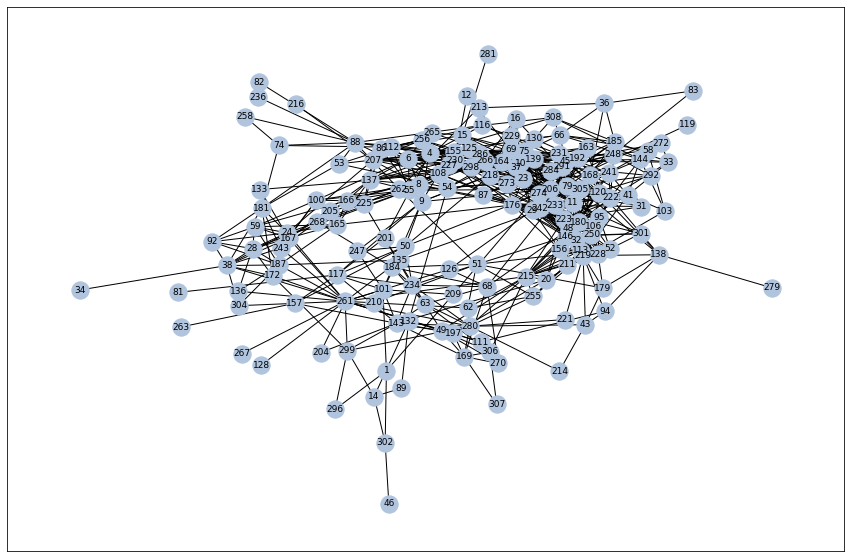

In [14]:
pos = nx.spring_layout(g, seed=1)
# nodes
nx.draw_networkx_nodes(g, pos, node_size=300, node_color='lightsteelblue',alpha=1,linewidths=1)
# edges
nx.draw_networkx_edges(g, pos, width=1, edge_color="black") # adding this does sweet nothing : arrows=True,arrowstyle ='fancy', connectionstyle="arc3,rad=0.5",
# labels
nx.draw_networkx_labels(g, pos, font_size=9,font_family="Sans-serif",font_color= "black")
#figure size
plt.rcParams['figure.figsize'] = [15,10]
ax = plt.gca()

## Defining modules within network using louvian

Modularity of the network: 
0.4970259730826243


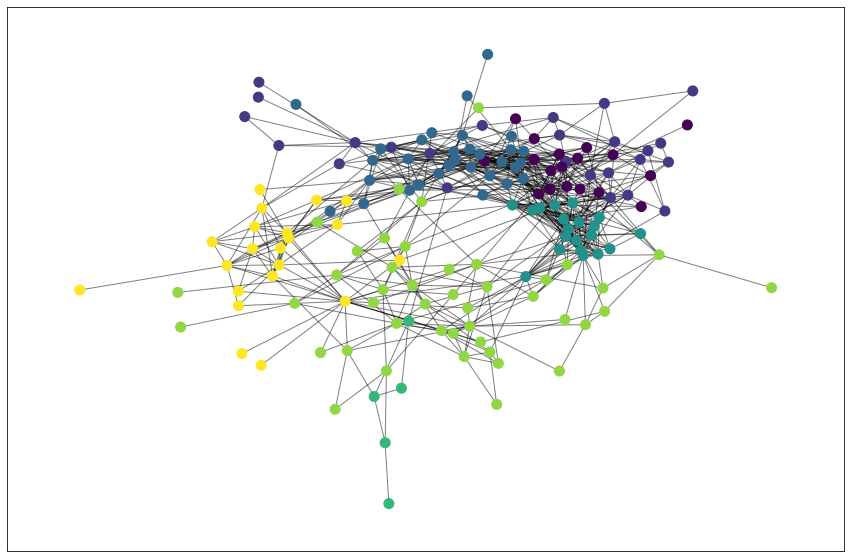

In [16]:
import matplotlib.cm as cm
import community as community_louvain
partition = community_louvain.best_partition(g)

import networkx.algorithms.community as nx_comm
modularity = nx_comm.modularity(g,nx_comm.label_propagation_communities(g))
print('Modularity of the network: ' + '\n' + str(modularity))

pos = nx.spring_layout(g, seed=1)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(g, pos, partition.keys(), node_size=100,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(g, pos, alpha=0.5)

for node in partition:
    g.nodes[node]["cluster"] = partition[node]
# save file
nx.write_gml(g, "node_attributes.txt")
plt.show()

## Determine the Degree and betweeness centrality of each node

In [18]:
# DEGREE
degree_dict = dict(nx.degree(g))
nx.set_node_attributes(g, degree_dict, 'Degree')
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
df_degree = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['Degree'])
df_degree.index.name = 'name'
df_degree.reset_index(level=0, inplace=True)

# BETWEENESS CENTRALITY
betweenness_dict = nx.betweenness_centrality(g)
nx.set_node_attributes(g, betweenness_dict, 'betweenness')
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
df_btwns = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['BetweennessCentrality'])
df_btwns.index.name = 'name'
df_btwns.reset_index(level=0, inplace=True)

# MERGE
df_btwns_merge = pd.merge(df_degree, df_btwns, how='left', left_on='name', right_on='name')

## Load the B1 capacity, node numbers and merge

In [19]:
os.chdir('/groups/banfield/projects/industrial/ThiocyanateBioreactor/2021/SCN_phage/microbial_SCN_genomes/vitamin_pathways')
df_b1 = pd.read_csv('thiamin_biosynthetic_capacity_SCN309.csv', engine='python', header=0, sep=",")

os.chdir('/groups/banfield/projects/industrial/ThiocyanateBioreactor/2021/SCN_phage/microbial_SCN_genomes/network_analysis')
df_nodes = pd.read_csv('add_node_SCN_metadata_sumary.csv', engine='python', header=0, sep=",")
df_nodes = df_nodes[['Genome','node number','Taxonomy']]
df_nodes['Genome'] = df_nodes['Genome'].astype(str)
df_nodes['Genome'] = df_nodes['Genome'].map(lambda x: x.rstrip('.contigs.fna'))

df_merge = pd.merge(df_b1, df_nodes, how='left', left_on='bin', right_on='Genome')
del df_merge['Genome']
df_merge['B1 biosynthesis capacity'] = df_merge['B1 biosynthesis capacity'].fillna(0)
df_merge['B1 biosynthesis capacity'] = df_merge['B1 biosynthesis capacity'].replace('Positive', 1)
df_merge = df_merge.rename(columns={'B1 biosynthesis capacity': 'Thiamin_19Sep'})

df_nodetbl = df_btwns_merge.copy()
df_merge = pd.merge(df_merge, df_nodetbl, how='left', left_on='node number', right_on='name')
del df_merge['name']

df_merge = df_merge.sort_values('node number', ascending=True)
df_merge['Thiamin_19Sep'] = df_merge['Thiamin_19Sep'].astype(int)
df_merge['node number'] = df_merge['node number'].astype(int)

print(len(df_merge))
df_merge = df_merge[df_merge['node number'].isin(all_nodes)]
print(len(df_merge))

309
164


## Caluclate Hub metrics

In [21]:
vitamin = ['Thiamin_19Sep']
for v in vitamin:

    median_degrees = []
    mean_degrees = []
    positive_connections =[]
    median_degree_vitamin_auxotrophs = []
    mean_degree_vitamin_auxotrophs = []
    mean_degree_of_vitamin_auxotroph_to_vitamins = []
    Vitamin_connections = []
    
    # For every node in the graph (eg. Variovorax)
    for i in all_nodes:
        
        # store information about eg. Variovorax's neighbours in df_empty
        df_empty = df_merge[0:0]   
    
        # Identify its (eg. Variovorax) neighbours (eg. Variovorax's 15 connections)
        for neighbor in g.neighbors(i):
            df_new = df_merge[df_merge['node number']  == neighbor]
            df_empty = df_empty.append(df_new)
            # store information about each of these nodes connections in df_empty_2
            df_empty_2 = df_empty[0:0]
        
            # And identify every neighbour of the neighbour (eg. Tm7's connections)
            for neighbor_2 in g.neighbors(neighbor):
                df_new_2 = df_merge[df_merge['node number']  == neighbor_2]
                df_empty_2 = df_empty_2.append(df_new_2)
                df_empty_2[v] = df_empty_2[v].astype(int)
                Vitamin_connections = df_empty_2[v].sum()
                
            df_empty.loc[df_empty['node number'] == neighbor, 'Vitamin_connections'] = Vitamin_connections
            
        median_degree = df_empty['Degree'].median()
        median_degrees.append(median_degree)
        mean_degree = df_empty['Degree'].mean()
        mean_degrees.append(mean_degree)
        df_empty[v] = df_empty[v].astype(int)
        positive_connection = df_empty[v].sum()
        positive_connections.append(positive_connection)
        df_empty_negs = df_empty[~df_empty[v].isin([1])]
        median_degree_vitamin_auxotroph = df_empty_negs['Degree'].median()
        median_degree_vitamin_auxotrophs.append(median_degree_vitamin_auxotroph)    
        mean_degree_vitamin_auxotroph = df_empty_negs['Degree'].mean()
        mean_degree_vitamin_auxotrophs.append(mean_degree_vitamin_auxotroph)
        Vitamin_connections = df_empty_2[v].sum()    # df empty or empty 2?          
        mean_degree_of_vitamin_auxotroph_to_vitamin = df_empty_negs['Vitamin_connections'].mean()
        mean_degree_of_vitamin_auxotroph_to_vitamins.append(mean_degree_of_vitamin_auxotroph_to_vitamin) 
            
    df_merge['median degree of first neighbours'] = median_degrees
    df_merge['mean degree of first neighbours'] = mean_degrees   
    df_merge[v+'positive_connections'] = positive_connections
    df_merge['median_degree_'+ v +'_auxotrophs'] = median_degree_vitamin_auxotrophs
    df_merge['mean_degree_'+ v + '_auxotrophs'] = mean_degree_vitamin_auxotrophs
    df_merge['mean_degree_of_'+ v +'_auxotroph_to_'+v+'s'] = mean_degree_of_vitamin_auxotroph_to_vitamins
    df_merge[v+'positive_connections'] = pd.to_numeric(df_merge[v+'positive_connections'])
    df_merge['Degree'] = pd.to_numeric(df_merge['Degree'])
    df_merge[v + 'aux connections'] = (df_merge['Degree']) - (df_merge[v+'positive_connections'])
    df_merge[v + '_hub_metric'] = (df_merge['Degree'] * df_merge[v + 'aux connections'])/((df_merge['mean_degree_of_'+ v +'_auxotroph_to_'+v+'s']))

## Summarising results

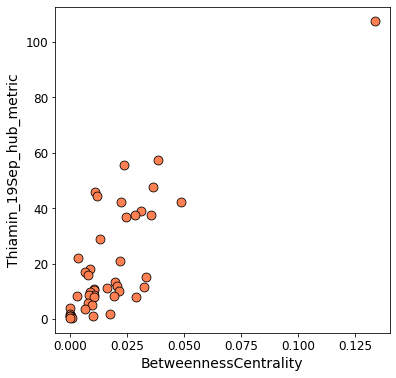

In [26]:
df_merge['node number'] = df_merge['node number'].astype(int)
df_merge_hub = df_merge[['bin','node number','Taxonomy','Thiamin_19Sep','Thiamin_19Sep_hub_metric']]
df_merge_hub.to_csv('flashweave0.035_thiamine_hub_metric.csv', sep=',', index=False)

df_merge2 = df_merge.sort_values('BetweennessCentrality', ascending=False)
save_df = df_merge2.head(50)
save_df.to_csv('flashweave_btwnss_head_0.35cutoff.csv', sep=',', index=False)
df_merge2.head(10)

df_merge2 = df_merge[df_merge['Thiamin_19Sep'] == 1]
df_merge2 = df_merge2.sort_values('Thiamin_19Sep_hub_metric', ascending=False)
save_df = df_merge2.head(50)
save_df.to_csv('flashweave_hub_metric_head_0.35cutoff.csv', sep=',', index=False)

ax1 = df_merge2.plot.scatter(x='BetweennessCentrality',y='Thiamin_19Sep_hub_metric',c='coral', alpha = 0.99, fontsize =12,edgecolor='black', figsize = (6,6), s= 80, linewidth=0.8)